# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Answer 1:
The data represent 17 campaigns for the period of time from May 2008 to November 2010


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd

In [7]:
bank = pd.read_csv('data/bank-additional.csv', sep = ';')

In [8]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Answer 3:

The data frame has no missing values; however, there are 11 features with object data types that should be converted to numeric values using techniques such as one-hot encoding.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Answer 4:

The Business Objective of this task is to create an optimal classification model that would identify the target audience for future marketing campaigns with a high probability of subscribing to the term deposit product of the bank. The model should also help to identify characteristics (features) that lead to a higher campaign conversion rate and ultimately improve resource allocation.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

### Note 5:
I decided to use all columns (instead of 1 through 7) for this exercise to make sure I captured all the importent features; however, I used the smaller data set to optimize the run time. Additionaly, I removed the 'duration' column, as this is not known before a call is performed and should only be included for benchmark purposes as per feature description.

In [10]:
# Convert 'yes' and 'no' in column 'y' to 1 and 0 respectively
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})
y = bank['y']

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Transform feature columns using OneHotEncoder for categorical and StandardScaler for numerical data
categorical_cols = bank.select_dtypes(include=['object']).columns.tolist()
numerical_cols = [col for col in bank.columns if bank[col].dtype in ['int64', 'float64'] and col != 'y' and col !='duration']

# Setup ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply transformations excluding 'y'
X_preprocessed = bank.drop(columns=['y'])
X_transformed = preprocessor.fit_transform(X_preprocessed)


In [12]:
import numpy as np

# Retrive the new column names after one-hot encoding
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)


# Combine all feature names
numerical_features = numerical_cols
all_features = np.array(numerical_features + list(categorical_features))

# Create a DataFrame with the transformed data
X = pd.DataFrame(X_transformed, columns=all_features)

X.head()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.980752,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.107991,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.465619,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.204965,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.667795,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   float64
 1   campaign                       4119 non-null   float64
 2   pdays                          4119 non-null   float64
 3   previous                       4119 non-null   float64
 4   emp.var.rate                   4119 non-null   float64
 5   cons.price.idx                 4119 non-null   float64
 6   cons.conf.idx                  4119 non-null   float64
 7   euribor3m                      4119 non-null   float64
 8   nr.employed                    4119 non-null   float64
 9   job_admin.                     4119 non-null   float64
 10  job_blue-collar                4119 non-null   float64
 11  job_entrepreneur               4119 non-null   float64
 12  job_housemaid                  4119 non-null   f

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Store X_train and X_test as contiguous block of memory for KNN model to work in the later problems
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Note 7: 
I used Majority Class Baseline on the test set to determin the baseline performance.

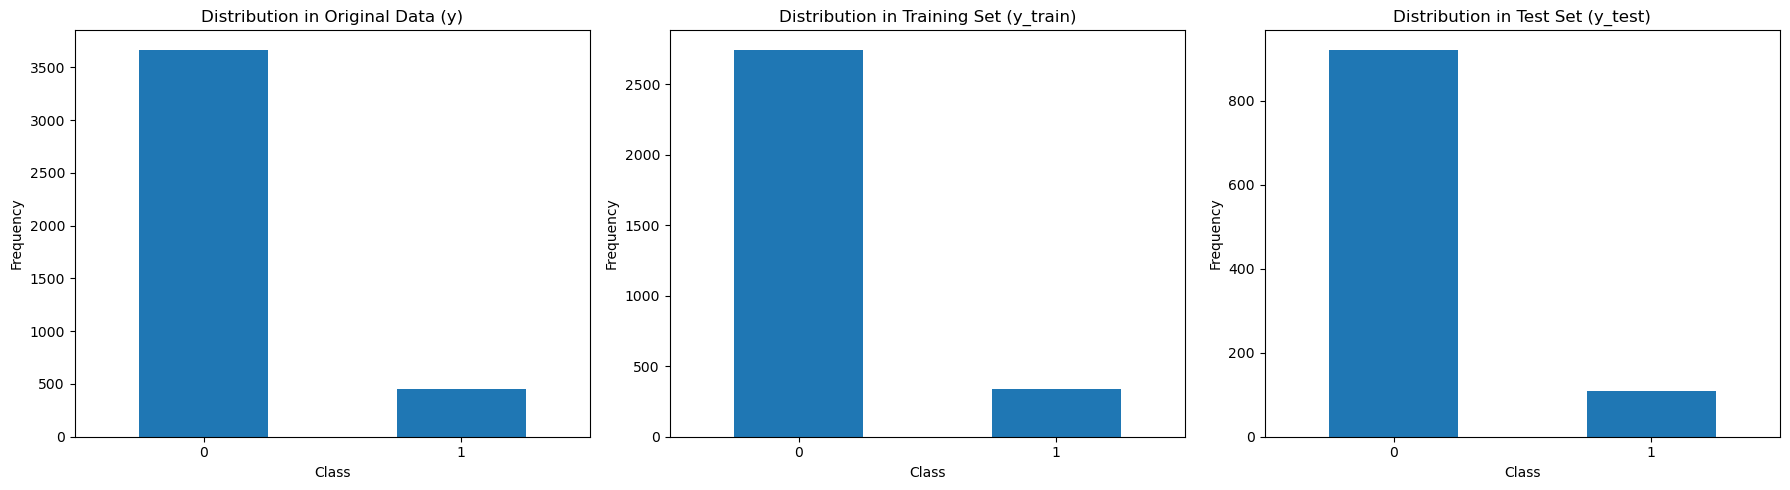

In [15]:
import matplotlib.pyplot as plt

# Create bar plots showing the distribution of data in column 'y'
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Original data distribution
bank['y'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Distribution in Original Data (y)')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Frequency')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['0', '1'], rotation=0)

# Training set distribution
y_train.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Distribution in Training Set (y_train)')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['0', '1'], rotation=0)

# Test set distribution
y_test.value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_title('Distribution in Test Set (y_test)')
axs[2].set_xlabel('Class')
axs[2].set_ylabel('Frequency')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['0', '1'], rotation=0)

plt.tight_layout()
plt.show()

In [17]:
# Calculate baseline on the test set
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier().fit(X_train, y_train)
baseline = dummy.score(X_test, y_test)

print("Majority Class Baseline :", baseline) 

Majority Class Baseline : 0.8941747572815534


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Build basic Logistic Regression Model

lrg = LogisticRegression(max_iter=1000)
lrg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

### Problem 9: Score the Model

What is the accuracy of your model?

In [19]:
# Use Logistic Regression to calculate the accuracy score
y_pred = lrg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of basic Logistic Regression model:", accuracy)

Accuracy of basic Logistic Regression model: 0.9009708737864077


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [56]:
# Set up results table

results = {
    'Model' : [],
    'Accuracy' : [],
    'Precision' : [],
    'Recall' : [],
    'F1-Score' : [],
    'Train Time' : [],
    'Inference Time' : []
}

In [22]:
# Initiate classification models

models = {
    'KNN' : KNeighborsClassifier(),
    'Decision Trees': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM':SVC()
}

In [23]:
# Calculate model performance measures

import time
from sklearn import metrics
for model_name, model in models.items():
  start_time = time.time()
  model.fit(X_train, y_train)
  train_time = time.time() - start_time

  start_time = time.time()
  y_pred = model.predict(X_test)
  inference_time = time.time() - start_time

  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred)

  results['Model'].append(model_name)
  results['Accuracy'].append(round(accuracy, 4))
  results['Precision'].append(round(precision, 4))
  results['Recall'].append(round(recall, 4))
  results['F1-Score'].append(round(f1, 4))
  results['Train Time'].append(round(train_time, 4))
  results['Inference Time'].append(round(inference_time, 4))

In [24]:
pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1-Score,Train Time,Inference Time
0,KNN,0.8942,0.5000,0.2110,0.2968,0.0027,0.1499
1,Decision Trees,0.8563,0.3333,0.3578,0.3451,0.0264,0.0003
2,Logistic Regression,0.9010,0.6207,0.1651,0.2609,0.0821,0.0002
3,SVM,0.9010,0.6207,0.1651,0.2609,0.3116,0.1710


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Note 11:

According to the paper accompanying the project, there were 29 input variables (features) already removed from the original dataset during the feature engineering and exploration process as they had little or no impact on the target variable. For example, 'sex' feature was removed since the rate of success for male and female was almost the same. Therefore, after visualizing and analyzing the remaining features in the dataset, I decided to keep all of them, but would use dimensionality reduction techniques, such as PCA, to optimize feature selection process during subsequent modeling.  

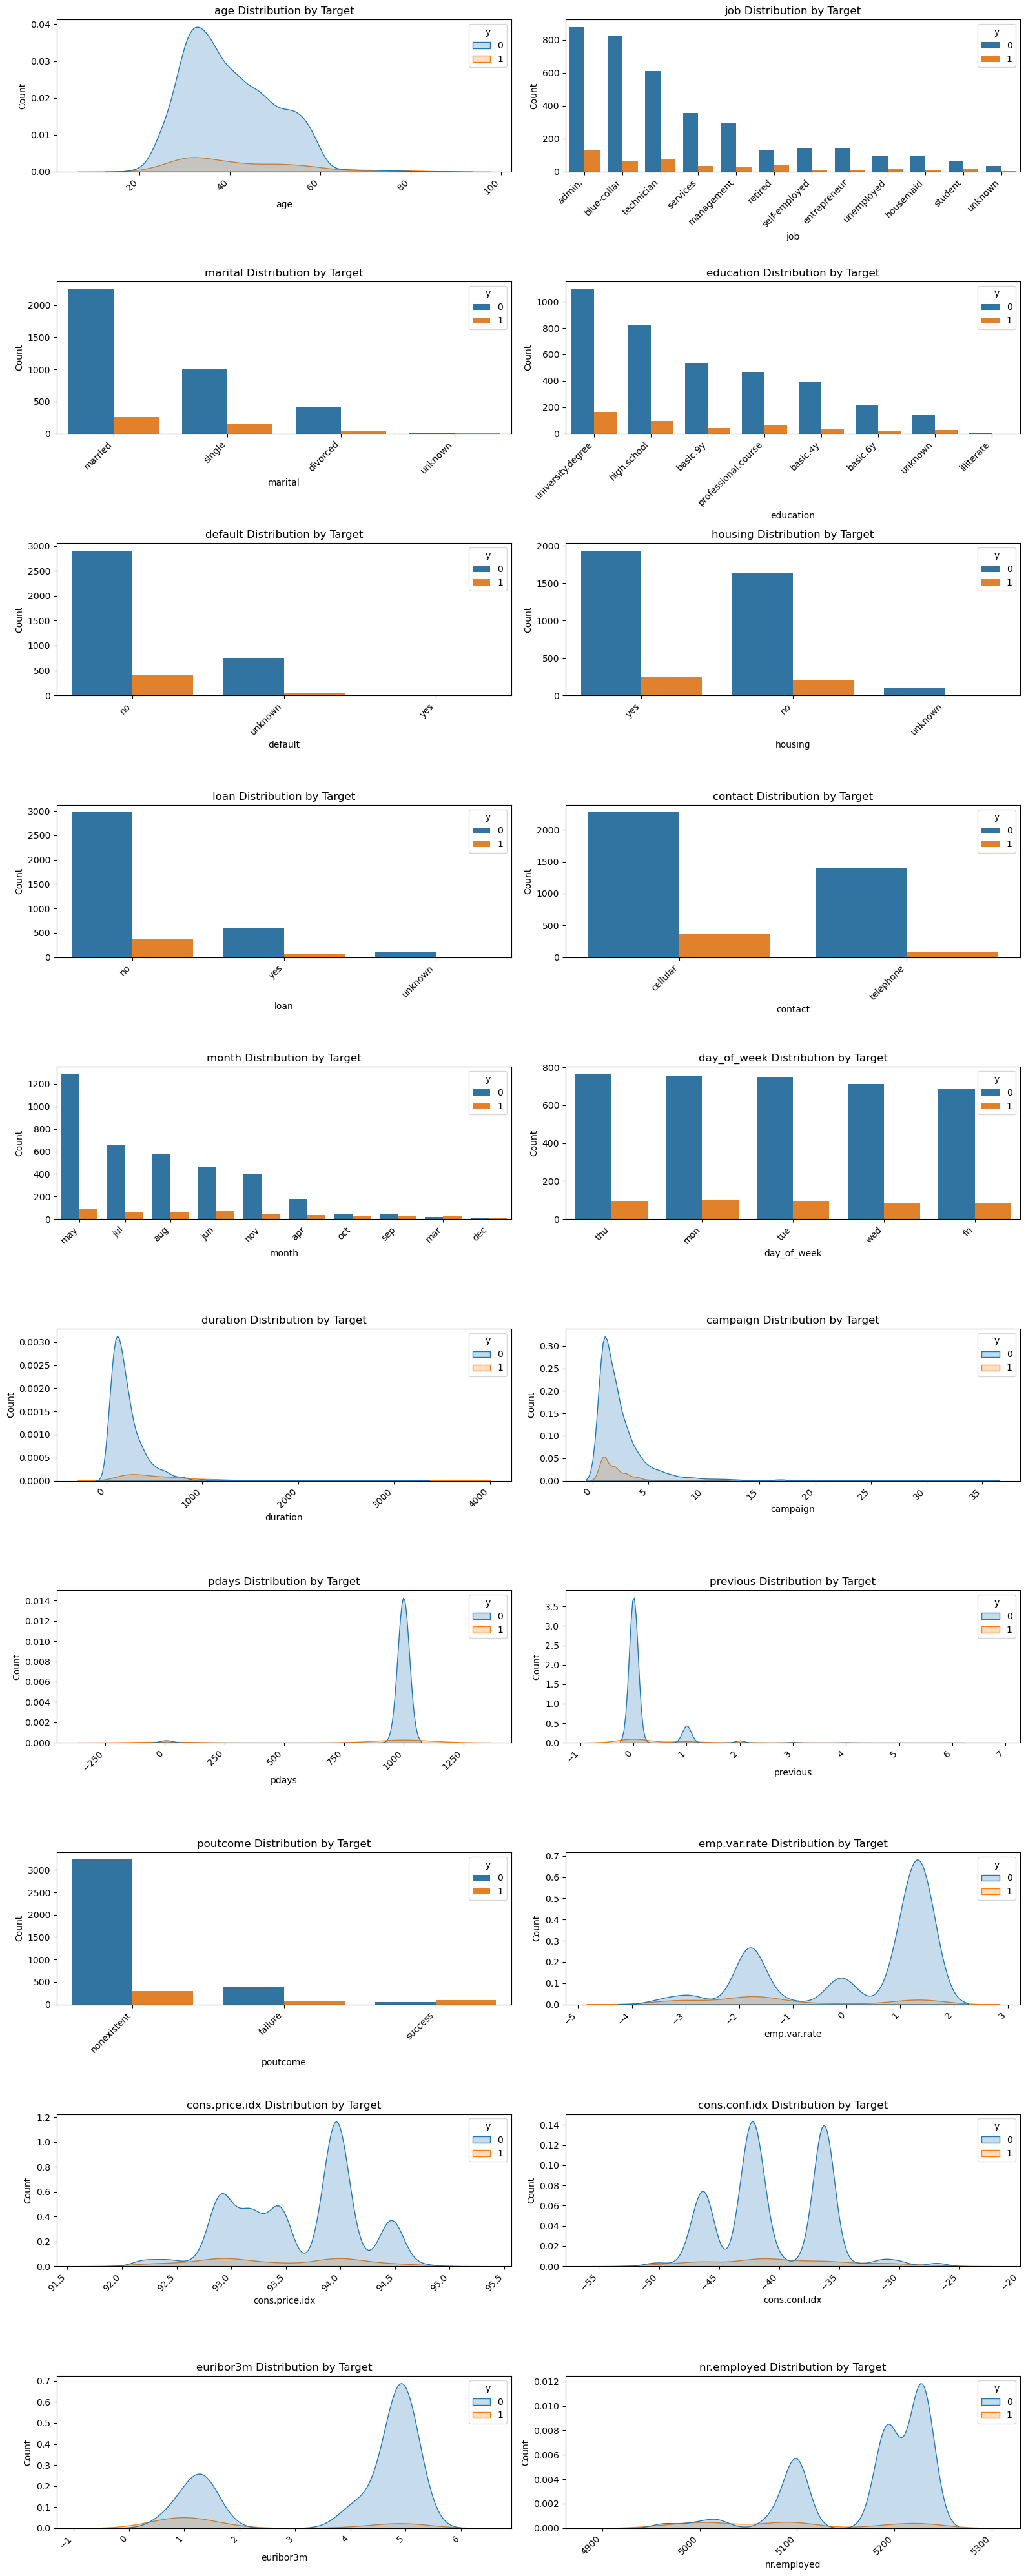

In [20]:
# Create graphs to visualize and analyze all the features in the dataset

import seaborn as sns
fig, axs = plt.subplots(10, 2, figsize=(16, 40))
axs = axs.flatten()

features = bank.columns.drop(['y'])

for i, feature in enumerate(features):
    ax = axs[i]
    if bank[feature].dtype in ['int64', 'float64']:
        sns.kdeplot(x=feature, hue="y", data=bank, ax=ax, fill=True)
    else:  
        sns.countplot(x=feature, hue="y", data=bank, ax=ax, order=bank[feature].value_counts().index)
    
    ax.set_title(f'{feature} Distribution by Target')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

In [29]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import PolynomialFeatures

In [29]:
# Create KNN Model with PCA in the Pipeline

pipeline = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

Define the Parameter Grid
param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'knn__n_neighbors': range(1, len(y_test), 2)
}

Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid)

# Measure the time it takes to train the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Display best parameters
print("Best parameters found:", grid_search.best_params_)

# Measure inference time
start_time = time.time()
y_pred = grid_search.predict(X_test)
inference_time = time.time() - start_time

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")

Best parameters found: {'knn__n_neighbors': 117, 'pca__n_components': 10}
Accuracy: 0.9019
Precision: 0.6250
Recall: 0.1835
F1-Score: 0.2837
Training Time: 1651.2901 seconds
Inference Time: 0.1610 seconds


In [54]:
# Create KNN Model without PCA

pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

Define the Parameter Grid
param_grid = {
    'knn__n_neighbors': range(1, len(y_test))
}

Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid)

# Measure the time it takes to train the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Display best parameters
print("Best parameters found:", grid_search.best_params_)

# Measure inference time
start_time = time.time()
y_pred = grid_search.predict(X_test)
inference_time = time.time() - start_time

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")

Best parameters found: {'knn__n_neighbors': 22}
Accuracy: 0.9000
Precision: 0.6000
Recall: 0.1651
F1-Score: 0.2590
Training Time: 318.3225 seconds
Inference Time: 0.0225 seconds


In [30]:
# Create Decision Tree model with PCA in the Pipeline

pipeline = Pipeline([
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(random_state=42))
])


param_grid = {
    'pca__n_components': [None, 5, 10, 15, 20],
    'dt__max_depth': [None, 5, 10, 15],
    'dt__min_samples_split': [2, 4, 6],
    'dt__min_samples_leaf': [1, 2, 3]
}


grid_search = GridSearchCV(pipeline, param_grid)

# Measure the time it takes to train the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Display best parameters
print("Best parameters found:", grid_search.best_params_)

# Measure inference time
start_time = time.time()
y_pred = grid_search.predict(X_test)
inference_time = time.time() - start_time

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")

Best parameters found: {'dt__max_depth': 5, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2, 'pca__n_components': 10}
Accuracy: 0.8932
Precision: 0.4902
Recall: 0.2294
F1-Score: 0.3125
Training Time: 67.0251 seconds
Inference Time: 0.0018 seconds


In [34]:
# Create Decision Tree model without PCA

pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])


param_grid = {
    'dt__max_depth': [None, 5, 10, 15],
    'dt__min_samples_split': [2, 4, 6],
    'dt__min_samples_leaf': [1, 2, 3]
}


grid_search = GridSearchCV(pipeline, param_grid)

# Measure the time it takes to train the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Display best parameters
print("Best parameters found:", grid_search.best_params_)

# Measure inference time
start_time = time.time()
y_pred = grid_search.predict(X_test)
inference_time = time.time() - start_time

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")

Best parameters found: {'dt__max_depth': 5, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Accuracy: 0.8971
Precision: 0.5306
Recall: 0.2385
F1-Score: 0.3291
Training Time: 2.5477 seconds
Inference Time: 0.0011 seconds


In [49]:
# Create Logistic Regression Model with PCA in the Pipeline

pipeline = Pipeline([
    ('pca', PCA()),
    ('logistic', LogisticRegression(max_iter=1000, random_state=42)) 
])


param_grid = {
    'pca__n_components': [None, 5, 10, 15, 20],
    'logistic__C': np.logspace(-4, 4, 4)
}


grid_search = GridSearchCV(pipeline, param_grid)

# Measure the time it takes to train the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Display best parameters
print("Best parameters found:", grid_search.best_params_)

# Measure inference time
start_time = time.time()
y_pred = grid_search.predict(X_test)
inference_time = time.time() - start_time

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")

Best parameters found: {'logistic__C': 0.046415888336127774, 'pca__n_components': None}
Accuracy: 0.9049
Precision: 0.7200
Recall: 0.1651
F1-Score: 0.2687
Training Time: 3.6144 seconds
Inference Time: 0.0018 seconds


In [33]:
# Create SVC Model with PCA in the Pipeline

pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(random_state=42))
])


param_grid = {
    'pca__n_components': [None, 5, 10, 15, 20],
    'svm__C': np.logspace(-3, 2, 6),  
    'svm__gamma': np.logspace(-3, 2, 6),  
    'svm__kernel': ['rbf', 'linear'] 
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Measure the time it takes to train the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Display best parameters
print("Best parameters found:", grid_search.best_params_)

# Measure inference time
start_time = time.time()
y_pred = grid_search.predict(X_test)
inference_time = time.time() - start_time

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters found: {'pca__n_components': 5, 'svm__C': 100.0, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
Accuracy: 0.9019
Precision: 0.6667
Recall: 0.1468
F1-Score: 0.2406
Training Time: 4102.5813 seconds
Inference Time: 0.0290 seconds


In [51]:
# Create SVC Model without PCS

pipeline = Pipeline([
    ('svm', SVC(random_state=42))
])

# Step 2: Define the Parameter Grid
# Adjust C and gamma ranges based on your dataset
param_grid = {
    'svm__kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
    'svm__gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Measure the time it takes to train the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Display best parameters
print("Best parameters found:", grid_search.best_params_)

# Measure inference time
start_time = time.time()
y_pred = grid_search.predict(X_test)
inference_time = time.time() - start_time

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Displaying the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Inference Time: {inference_time:.4f} seconds")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Accuracy: 0.9010
Precision: 0.6129
Recall: 0.1743
F1-Score: 0.2714
Training Time: 11.9610 seconds
Inference Time: 0.1805 seconds


In [40]:
results2 = {
    'Model' : ['KNN','Decision Trees', 'Logistic Regression', 'SVM'],
    'Accuracy' : ['0.9019', '0.8971', '0.9049', '0.9019'],
    'Precision' : ['0.6250', '0.5306', '0.7200', '0.6667' ],
    'Recall' : ['0.1835', '0.2385', '0.1651', '0.1468'],
    'F1-Score' : ['0.2837', '0.3291', '0.2687', '0.2406'],
    'Train Time' : ['1651.2901', '2.5477', '3.1088', '4102.5813'],
    'Inference Time' : ['0.1610', '0.0011', '0.0015', '0.0290']
}

pd.DataFrame(results2)



,Model,Accuracy,Precision,Recall,F1-Score,Train Time,Inference Time
0,KNN,0.9019,0.6250,0.1835,0.2837,1651.2901,0.1610
1,Decision Trees,0.8971,0.5306,0.2385,0.3291,2.5477,0.0011
2,Logistic Regression,0.9049,0.7200,0.1651,0.2687,3.1088,0.0015
3,SVM,0.9019,0.6667,0.1468,0.2406,4102.5813,0.0290


In [52]:

# Create a DataFrame with percentage difference between results in first and second tables

df_results = pd.DataFrame(results)
df_results2 = pd.DataFrame(results2)


df_results.set_index('Model', inplace=True)
df_results2.set_index('Model', inplace=True)


percentage_diff = ((df_results2 - df_results) / df_results) * 100

for column in percentage_diff.columns:
    percentage_diff[column] = percentage_diff[column].round(1).astype(str) + '%'


percentage_diff.reset_index(inplace=True)

# Display the formatted percentage difference DataFrame
pd.DataFrame(percentage_diff)

,Model,Accuracy,Precision,Recall,F1-Score,Train Time,Inference Time
0,KNN,0.9%,25.0%,-13.0%,-4.4%,61158792.6%,7.4%
1,Decision Trees,4.8%,59.2%,-33.3%,-4.6%,9550.4%,266.7%
2,Logistic Regression,0.4%,16.0%,0.0%,3.0%,3686.6%,650.0%
3,SVM,0.1%,7.4%,-11.1%,-7.8%,1316517.9%,-83.0%


##### Questions